### 1. 請說明你用哪一個 word2vec 套件，並針對你有調整的參數說明那個參數的意義

https://blog.csdn.net/yj928674542/article/details/75634197

In [11]:
import pandas as pd
import jieba
import matplotlib.pyplot as plt
import os
import gensim
from sklearn.manifold import TSNE
import numpy as np
import time
from adjustText import adjust_text


%matplotlib inline

In [12]:
jieba_dit_path = os.path.join(os.getcwd(),'dataset','dict.txt.big')
jieba.set_dictionary(jieba_dit_path)

In [13]:
path = os.path.join(os.getcwd(),'dataset','all_sents.txt')
with open(path,"r") as f:
    lines=f.readlines()
lines

['沒有我得不到的\n',
 '現在你不誇獎我\n',
 '你要把握這個機會\n',
 '別在這裡丟人現眼\n',
 '當然要知道他的想法\n',
 '鐵的紀律的崇尚者對吧\n',
 '不要牽扯我身邊的人\n',
 '眼睜睜看她被你欺負\n',
 '文進你趕快打電話回去\n',
 '妳看現在旁邊都沒有人\n',
 '順便把戶口遷到監獄裡\n',
 '有什麼事明天再說\n',
 '現在換我請你\n',
 '叫你不要跟文琪來往\n',
 '不要說只是稱讚幾句\n',
 '其實換個立場\n',
 '為什麼去接曉萍會這麼久\n',
 '無論妳有什麼問題\n',
 '阿勇請兩位董事長坐\n',
 '妳明明就去了\n',
 '被火一燻眼淚就\n',
 '搞死自己罷了\n',
 '也沒有丟媽媽的臉\n',
 '我交代過文隆\n',
 '是美純硬要留下孩子\n',
 '這個點心作得很好\n',
 '賺那一點薪水\n',
 '放進去炒一炒\n',
 '你都這麼說了\n',
 '妳最喜歡吃的\n',
 '需要我教妳嗎\n',
 '妳是否願意跟我搬出去\n',
 '妳也會喜歡她的\n',
 '所以我這個媽媽說話\n',
 '現在怎麼說警察要來抓我\n',
 '我再找時間去了解就好\n',
 '來走該回家了\n',
 '他不敢怎麼樣\n',
 '如果你想追曉萍\n',
 '有沒有怎麼樣\n',
 '有沒有遇到什麼問題\n',
 '我怕他在裡面會害怕\n',
 '用手機定位可以找到劉先生\n',
 '我一定會想辦法處理的\n',
 '他們倆怎麼走了\n',
 '人嚇人會嚇死人的\n',
 '撞壞你賠不起\n',
 '沒人不是更好嗎\n',
 '拿不出三十萬保釋金\n',
 '妳是不是怕叔叔出來\n',
 '乾脆趁今天這個機會\n',
 '現在馬上出去\n',
 '但是人家不這麼想\n',
 '白佳佳態度一直很強硬\n',
 '最後仍是如此收場\n',
 '我要告訴你們的是\n',
 '我先把手錶給妳們\n',
 '絕不會輸給她\n',
 '你為什麼要追人\n',
 '一定是仗著姊夫對她的照顧\n',
 '都是有頭有臉\n',
 '喂阿爸的灶腳你好\n',
 '如果有空會回去看我媽媽\n',
 '妳不是有話告訴我嗎\n',
 '無論如何韋恩\n',
 '剛才騎摩托車跑掉的\n',
 '你在掩飾

In [14]:
df_all_sents = pd.DataFrame({'raw': lines})
df_all_sents['raw2'] = df_all_sents['raw'].apply(lambda x: x.strip('\n'))
df_all_sents['cut'] = df_all_sents['raw2'].apply(lambda x: jieba.lcut(x))
df_all_sents

Building prefix dict from /media/disk3/feynman52/ntu-ml/hw6/dataset/dict.txt.big ...
Loading model from cache /tmp/jieba.u04d22ee1df3b7e4886f3035e94745e8b.cache
Loading model cost 1.431 seconds.
Prefix dict has been built succesfully.


,raw,raw2,cut
0,沒有我得不到的\n,沒有我得不到的,"[沒有, 我, 得不到, 的]"
1,現在你不誇獎我\n,現在你不誇獎我,"[現在, 你, 不, 誇獎, 我]"
2,你要把握這個機會\n,你要把握這個機會,"[你, 要, 把握, 這個, 機會]"
3,別在這裡丟人現眼\n,別在這裡丟人現眼,"[別, 在, 這裡, 丟人現眼]"
4,當然要知道他的想法\n,當然要知道他的想法,"[當然, 要, 知道, 他, 的, 想法]"
5,鐵的紀律的崇尚者對吧\n,鐵的紀律的崇尚者對吧,"[鐵的紀律, 的, 崇尚, 者, 對, 吧]"
6,不要牽扯我身邊的人\n,不要牽扯我身邊的人,"[不要, 牽扯, 我, 身邊, 的, 人]"
7,眼睜睜看她被你欺負\n,眼睜睜看她被你欺負,"[眼睜睜, 看, 她, 被, 你, 欺負]"
8,文進你趕快打電話回去\n,文進你趕快打電話回去,"[文進, 你, 趕快, 打電話, 回去]"
9,妳看現在旁邊都沒有人\n,妳看現在旁邊都沒有人,"[妳, 看, 現在, 旁邊, 都, 沒有, 人]"


In [15]:
all_sents = df_all_sents['cut'].values
all_sents.shape

(578810,)

https://radimrehurek.com/gensim/models/word2vec.html

In [16]:
model_word2vec = gensim.models.word2vec.Word2Vec(all_sents,
                                                 size=100, 
                                                 window=4, 
                                                 min_count=3000, 
                                                 workers=4)
model_word2vec

In [17]:
model_word2vec.wv.vocab

{'沒有': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c70240>,
 '我': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c70470>,
 '的': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c70390>,
 '現在': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c70320>,
 '你': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c70668>,
 '不': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c70710>,
 '要': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c706a0>,
 '這個': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c706d8>,
 '別': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c70438>,
 '在': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c70358>,
 '這裡': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c705c0>,
 '知道': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c70400>,
 '他': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c703c8>,
 '對': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c704a8>,
 '吧': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c70550>,
 '不要': <gensim.models.keyedvectors.Vocab at 0x7fdfe8c70518>,
 '人': <gensim.models.keyedvectors.

In [18]:
word_list = list(model_word2vec.wv.vocab.keys())
word_list

['沒有',
 '我',
 '的',
 '現在',
 '你',
 '不',
 '要',
 '這個',
 '別',
 '在',
 '這裡',
 '知道',
 '他',
 '對',
 '吧',
 '不要',
 '人',
 '看',
 '她',
 '被',
 '妳',
 '都',
 '把',
 '到',
 '有',
 '什麼',
 '事',
 '叫',
 '跟',
 '為',
 '去',
 '會',
 '問題',
 '就',
 '了',
 '自己',
 '也',
 '媽媽',
 '是',
 '孩子',
 '很',
 '好',
 '那',
 '一點',
 '這麼',
 '說',
 '最',
 '吃',
 '需要',
 '嗎',
 '所以',
 '怎麼',
 '再',
 '找',
 '時間',
 '來',
 '走',
 '如果',
 '想',
 '可以',
 '一定',
 '他們',
 '沒',
 '不是',
 '今天',
 '但是',
 '一直',
 '告訴',
 '你們',
 '先',
 '照顧',
 '剛才',
 '多',
 '一個',
 '才',
 '還是',
 '做',
 '爸',
 '我會',
 '聽',
 '一樣',
 '得',
 '這樣',
 '我們',
 '就是',
 '讓',
 '等',
 '啊',
 '已經',
 '幫',
 '之前',
 '錢',
 '又',
 '媽',
 '真的',
 '回來',
 '還',
 '因為',
 '那麼',
 '醫院',
 '覺得',
 '而且',
 '呢',
 '應該',
 '看到',
 '一起',
 '還有',
 '能夠',
 '可能',
 '這',
 '醫生',
 '爸爸',
 '和',
 '公司',
 '事情',
 '不會',
 '擔心',
 '這些',
 '拿',
 '好好',
 '這種',
 '希望',
 '大',
 '大家',
 '向',
 '與',
 '陳',
 '以後',
 '但',
 '上',
 '後',
 '月',
 '中',
 '以',
 '而',
 '年',
 '金城',
 '...',
 '「',
 '」',
 '陳家',
 '、',
 '有志',
 '，',
 '"',
 '麗芬',
 '春生',
 '有純']

In [19]:
model_word2vec.wv['沒有'].shape

(100,)

In [20]:
df_word2vec = pd.DataFrame({'word':word_list})
df_word2vec['vector'] = df_word2vec['word'].apply(lambda x: model_word2vec.wv[x])
df_word2vec

,word,vector
0,沒有,"[-0.5957938, -0.30795723, 0.2639246, 0.0380910..."
1,我,"[0.58516055, 0.6421774, -0.6641839, -0.4017745..."
2,的,"[-0.09260033, -0.29800284, -0.8071531, -0.4759..."
3,現在,"[-0.20994972, 0.092147395, -0.39190465, 0.3787..."
4,你,"[0.39513037, 0.4085356, -0.60256416, 0.0808558..."
5,不,"[-0.4990205, -0.027035087, -0.5182163, -0.3828..."
6,要,"[-0.09037053, -0.018405933, -0.21960951, 0.045..."
7,這個,"[-0.32511446, -0.14826433, 0.18906526, 0.39342..."
8,別,"[0.50123155, 0.3105687, 0.40970773, -0.3431588..."
9,在,"[-0.8415728, -1.3807646, 0.9908894, 0.39767918..."


In [21]:
vector_list = df_word2vec['vector'].values
vector_list = np.concatenate( vector_list, axis=0 ).reshape(-1,100)
vector_list.shape

(148, 100)

In [22]:
time_start = time.time()
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_results = tsne.fit_transform(vector_list)

In [23]:
tsne_results.shape

(148, 2)

In [24]:
df_word2vec['tsne_vec'] = list(tsne_results)
df_word2vec

,word,vector,tsne_vec
0,沒有,"[-0.5957938, -0.30795723, 0.2639246, 0.0380910...","[-0.4355846, 1.077531]"
1,我,"[0.58516055, 0.6421774, -0.6641839, -0.4017745...","[-3.4416764, -2.5603762]"
2,的,"[-0.09260033, -0.29800284, -0.8071531, -0.4759...","[1.4496288, 2.6458192]"
3,現在,"[-0.20994972, 0.092147395, -0.39190465, 0.3787...","[-1.6496412, -0.1530836]"
4,你,"[0.39513037, 0.4085356, -0.60256416, 0.0808558...","[-2.607403, -2.2475312]"
5,不,"[-0.4990205, -0.027035087, -0.5182163, -0.3828...","[1.4039246, -0.88481236]"
6,要,"[-0.09037053, -0.018405933, -0.21960951, 0.045...","[0.979729, -4.612395]"
7,這個,"[-0.32511446, -0.14826433, 0.18906526, 0.39342...","[0.4565292, -0.054655846]"
8,別,"[0.50123155, 0.3105687, 0.40970773, -0.3431588...","[-4.89777, -9.654113]"
9,在,"[-0.8415728, -1.3807646, 0.9908894, 0.39767918...","[0.2547075, 5.008569]"


In [25]:
tsne_vec_list = np.concatenate(df_word2vec.tsne_vec,axis=0).reshape(-1,2)
x = tsne_vec_list[:,0]
y = tsne_vec_list[:,1]
word = df_word2vec.word[:]

https://adjusttext.readthedocs.io/en/latest/Examples.html

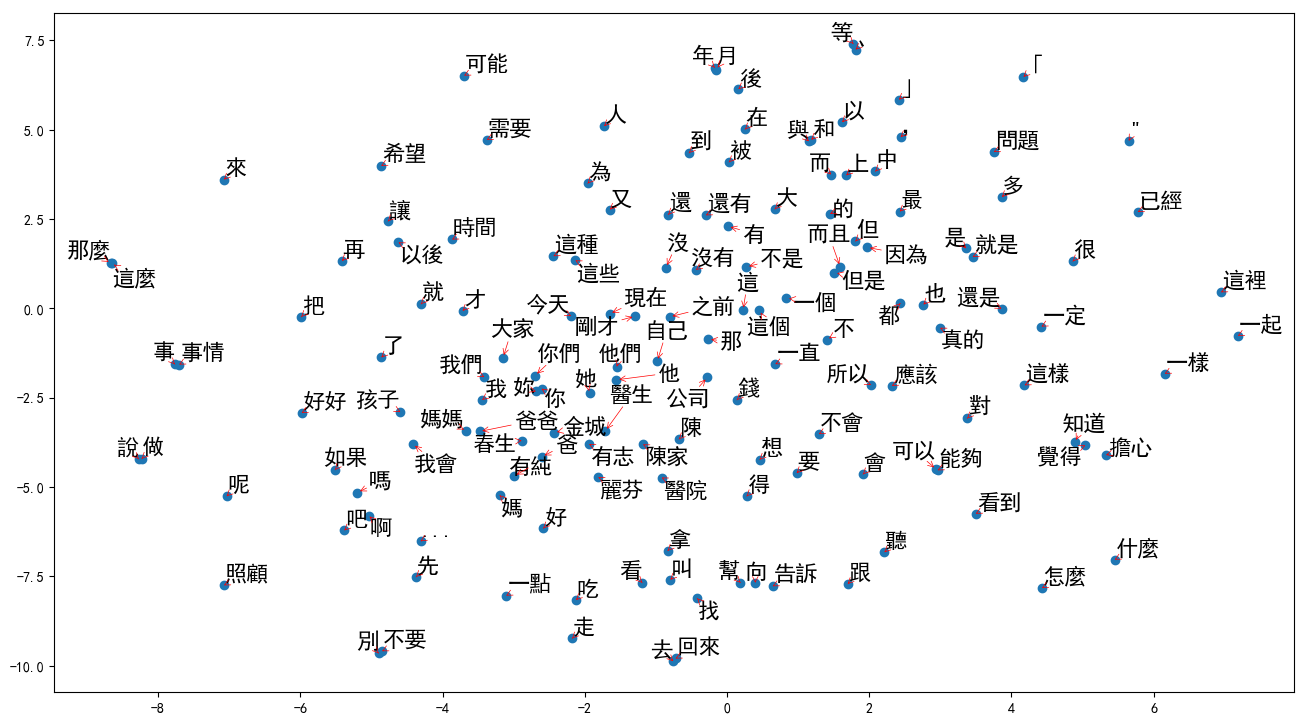

In [27]:
x_y_word = []
plt.figure(figsize=(16,9),dpi=100)
plt.rcParams['axes.unicode_minus'] = False 

plt.scatter(x,y)

for a, b, s in zip(x, y, word):
    x_y_word.append(plt.text(a, b, s, fontsize=16))
    
adjust_text(x_y_word, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.show()

### 2. 在 Report.pdf 上放上你visualization的結果

### 3. 請討論你從 visualization 的結果觀察到什麼？